## Is it right if we say that an image is `rgb-image` or `bgr-image`?

When working with images, it's important to understand the difference between the RGB and BGR color spaces. Both RGB and BGR have three color channels: red, green, and blue. However, the order in which those channels are stored in the image file can be different. RGB is commonly used in image editing and display applications, where the order is assumed as red, green, and blue. On the other hand, BGR is often used in image processing applications, and the order is assumed blue, green, and red.

The color order of the image data is determined by the software or library that reads and interprets the image file. An image data can be saved in different color space (RGB, BGR, Gray, etc.) and different file format can save the image in different color space. It depends on the image processing library and software which color space they use while saving(opening) an image. However, when saving an image to a file format, it is common practice to save it in the RGB color space. It's worth noting that when you save an image in BGR order, it can be still read by most of the libraries and software, but they will treat it as an RGB image and will show it in RGB format.(*You will see an image that red and blue channels are swapped*)

>Using tools like **exiftool** to check image's metadata, you may get `color mode: RGB`. However, it means that an image has 3 channels but it does not mean the order of 3 color channels is **red-green-blue**, it may be **blue-green-red**.

The program that reads and interprets the image file determines how the image's color channels are interpreted:different libraries, such as OpenCV and PIL, use different default decoding methods for image files, which can result in the image being interpreted as either **BGR** or **RGB**.

When using Python to work with image files, the OpenCV library (cv2) uses the BGR color space by default when reading images, while the PIL library uses the RGB color space.
```python
        import cv2
        from PIL import Image

        #reading an image using cv2.imread()
        img_bgr = cv2.imread("image.jpg")

        #reading an image using plt.imread()
        img_rgb = Image.open("image.jpg")
```

To conclude, when we say an rgb-image, sometimes referred to as a truecolor image, it means that an image was saved by assuming the order of color channels of that image red-green-blue, and bgr-image by assuming blue-green-red.
When we open that image and plot by some softwares or libraries, then these software or libraries decides to show the image whether in RGB-color-space or BGR-color-space.

<hr>

In [1]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [2]:
# Download image
!wget -q --no-check-certificate https://drive.google.com/u/0/uc?id=10A8WnZxxU14TqkbxzVrfKaH0HYpBziLd -O parrot-org.jpg

In [3]:
img_path = './parrot-org.jpg'

### Open an image in `RGB color space`

a pixel of parrot's beak: [240  26   0]


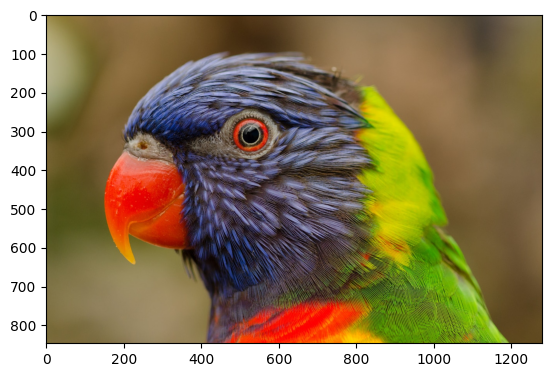

In [4]:
# Here we open rgb-image and show it in RGB-color-space
rgb_img = Image.open(img_path) 
# rgb_img.save("image_rgb.jpg")
print("a pixel of parrot's beak:", np.array(rgb_img)[500:501, 200:201, :][0,0])
plt.imshow(rgb_img);  # [240 26 0] --> 240 for red, 26 for green, 0 for red

<hr>

### `BGR representation` --> swapping color channels and showing it in `RGB color space`

BGR is not an actual color space, it is just a representation of an image where the order of the color channels is different than the traditional RGB representation. The color values of the pixels in the image remain the same, but the order of the color channels is swapped, with blue being the first channel, green being the second channel, and red being the third channel. 
>For example, `[240, 26, 0]` is the top-left pixel values, and when you plot the image by `plt.imshow()` you will see a red dot on the top-left of the image. So, it means that `plt.imshow()` used *RGB-color-space*, which it determined 255 for red, 0 for gren, 0 for blue. Then you swapped color channels like this: (1,2,3)-->(3,2,1). After that the top-left pixel values(`[240, 26, 0]`) changed to <br>`[0, 26, 240]` and then you plotted it again. Now you will see a blue dot on the top-left of the image. So, it means that `plt.imshow()` used *RGB-color-space* which it determined 0 for red, 0 for green, 255 for blue. That is why you are seeing a blue dot instead of red. <br>Based on this, we can say that BGR-color-space is a representation of an image, which color channels are swapped, in **RGB-color-space**.  
It is often used as a default color format in image processing libraries like OpenCV, where the images are read as BGR by default.

a pixel of parrot's beak: [  0  26 240]


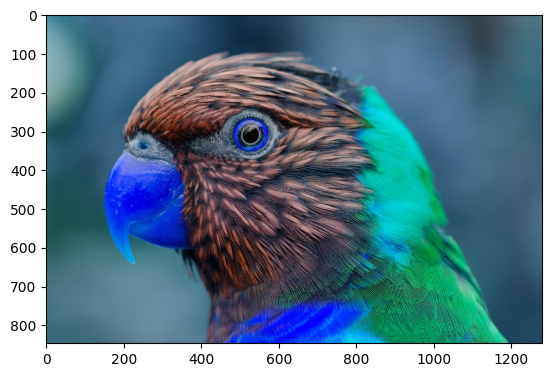

In [5]:
# Here we show bgr-image in RGB-color-space
rgb_data = np.array(rgb_img)
bgr_data = rgb_data[:, :, ::-1] # (1,2,3)-->(3,2,1) or (red,green,blue) --> (blue,green,red)
bgr_img = Image.fromarray(bgr_data)
# bgr_img.save("image_bgr.jpg")
print("a pixel of parrot's beak:", np.array(bgr_img)[500:501, 200:201, :][0,0])
plt.imshow(bgr_img);  # [0 26 240] --> 0 for red, 26 for green, 240 for blue

<hr>

### Convert 3-channels image to 1 channel one --> (grayscaling)

There are several ways to convert an image from the RGB color space to grayscale, but one of the most common method is to use a **weighted average** of the red, green, and blue values. This method assigns different weights to the three color channels, based on the relative sensitivity of the human eye to each color. The most common weights used are: `gray = 0.299 * R + 0.587 * G + 0.114 * B`

Another method to convert to grayscale is to use the **luminosity** method, which assigns different weights based on the human eye's luminosity function. It's a more accurate method for converting color images to grayscale. `gray = 0.2126 * R + 0.7152 * G + 0.0722 * B`
>OpenCV's `cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)` uses **weighted average** method <br>`Pil.ImageOps.grayscale(rgb_img)` uses **luminosity** method


top-left pixel values: [144]


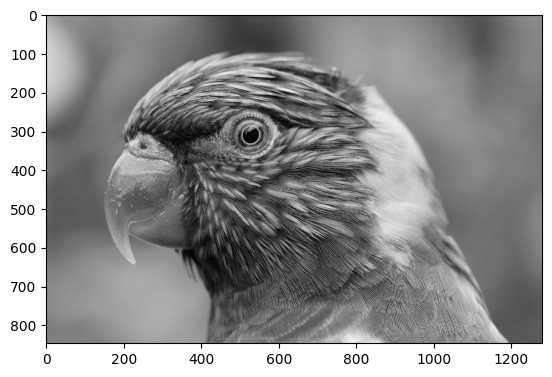

In [6]:
gray_img = ImageOps.grayscale(rgb_img)

# gray_img.save("image_gray.jpg")

print("top-left pixel values:", np.array(gray_img)[:1, :1][0])
plt.imshow(gray_img, cmap='gray');

<hr>

## See 3 color channels seperately in the order of RGB

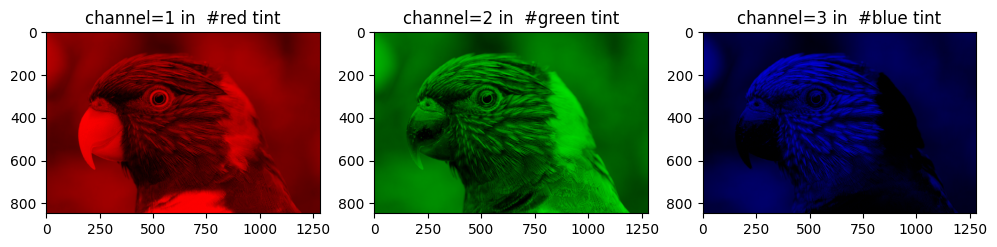

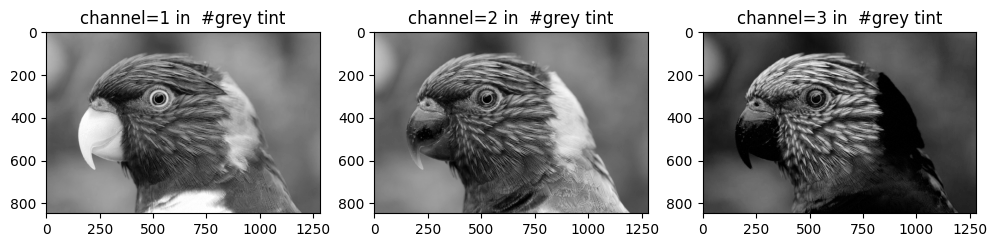

In [7]:
tint_names = ["red", "green", "blue"]

plt.figure(figsize=(12,5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    arr = np.zeros((3,), dtype='int')
    arr[i] = 1
    img1 = rgb_data*arr
    plt.title(f"channel={i+1} in  #{tint_names[i]} tint")
    plt.imshow(img1)    
        
plt.figure(figsize=(12,5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    img1 = rgb_data[:, :, i]
    plt.title(f"channel={i+1} in  #grey tint")
    plt.imshow(img1, cmap='gray')     


<hr>

### Check the metadata of an image

In [8]:
#### sudo apt install imagemagick
# !identify -verbose ./parrot-org.jpg

In [9]:
#### sudo apt install exif
!exiftool ./parrot-org.jpg

ExifTool Version Number         : 12.40
File Name                       : parrot-org.jpg
Directory                       : .
File Size                       : 221 KiB
File Modification Date/Time     : 2023:01:23 00:02:05+09:00
File Access Date/Time           : 2023:01:23 00:02:06+09:00
File Inode Change Date/Time     : 2023:01:23 00:02:05+09:00
File Permissions                : -rw-rw-r--
File Type                       : JPEG
File Type Extension             : jpg
MIME Type                       : image/jpeg
JFIF Version                    : 1.01
Resolution Unit                 : inches
X Resolution                    : 72
Y Resolution                    : 72
Profile CMM Type                : Linotronic
Profile Version                 : 2.1.0
Profile Class                   : Display Device Profile
Color Space Data                : RGB
Profile Connection Space        : XYZ
Profile Date Time               : 1998:02:09 06:49:00
Profile File Signature          : acsp
Primary Platform     

<hr>

# WITH OPENCV

>RGB-image --- saved by assuming the order of color channels was red-green-blue.

- When you read an RGB-image with opencv ---> `cv2.imread()` reads an rgb-image and returns it as bgr-image swapping color channels
- and plot it also using opencv ---> `cv2.imshow()` plots an image in BGR-color-space 

>So, when you open an rgb-image with opencv and plot it also using opencv you will see bgr-image in BGR-color-space, which seems the same as rgb-image in RGB-color-space.

In [10]:
import cv2

In [11]:
img_path = './parrot-org.jpg'

a pixel of parrot's beak: [  0  26 240]


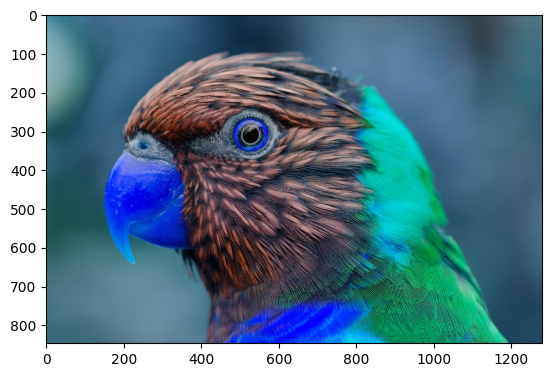

In [12]:
# Here we are opening an rgb-image with opencv which makes it bgr-image by swapping color channels
# and plotting this bgr-image with plt.imshow() which uses RGB-color-space. That is why we are
# seeing parrot with unusual colors. So, WE ARE SEEING BGR-IMAGE IN RGB-COLOR-SPACE.

bgr_img_by_cv2 = cv2.imread(img_path)  
print("a pixel of parrot's beak:", bgr_img_by_cv2[500:501, 200:201, :][0,0])
plt.imshow(bgr_img_by_cv2);  # [0 26 240] --> 0 for red, 26 for green, 240 for blue

<hr>
<br>

In [13]:
## If you run this cell you will see bgr-image in BGR-color-space
## pop-up window shows the image, press ESC key to close it.

cv2.imshow("bgr-image in BGR-color-space", bgr_img_by_cv2)  # [0 26 240] --> 0 for blue, 26 for green, 240 for red
cv2.waitKey(0)
cv2.destroyAllWindows()

<br>

a pixel of parrot's beak: [240  26   0]


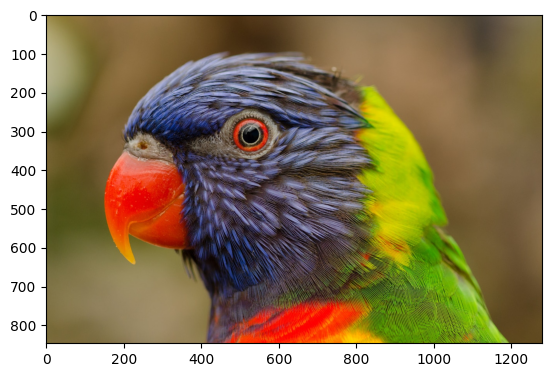

In [14]:
# Here we converted bgr-image to rgb-image and plot it in RGB-color-space

rgb_img_by_cv2 = cv2.cvtColor(bgr_img_by_cv2, cv2.COLOR_BGR2RGB)
print("a pixel of parrot's beak:", rgb_img_by_cv2[500:501, 200:201, :][0,0])
plt.imshow(rgb_img_by_cv2);  # [240 26 0] --> 240 for red, 26 for green, 0 for blue

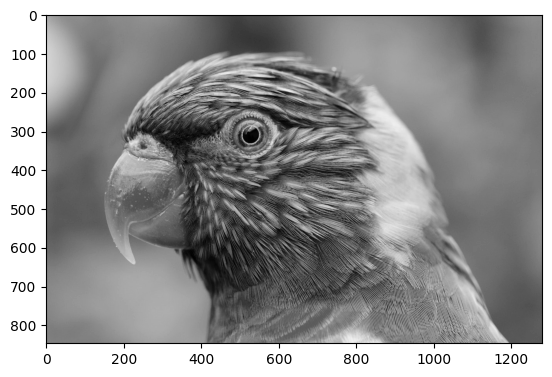

In [15]:
gray_img_by_cv2 = cv2.cvtColor(rgb_img_by_cv2, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_img_by_cv2, cmap='gray');

### Seperate channels

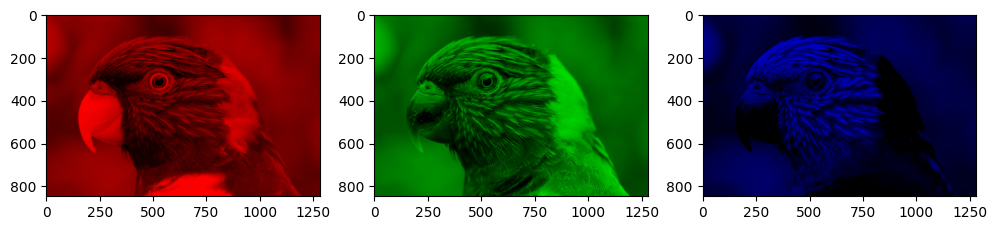

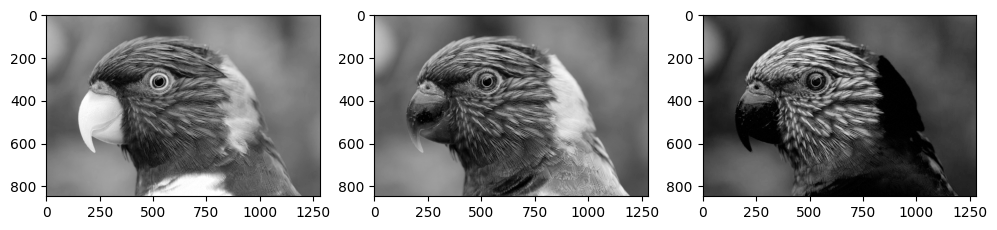

In [16]:
plt.figure(figsize=(12,5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    arr = np.zeros((3,), dtype='int')
    arr[i] = 1
    img1 = rgb_img_by_cv2*arr
    plt.imshow(img1)
    
plt.figure(figsize=(12,5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    img1 = rgb_img_by_cv2[:, :, i]
    plt.imshow(img1, cmap='gray')

<hr>
<br>

## Learn `color depth` with color channels to calculate how many bytes is 1 pixel

>First read [this...](https://www.quora.com/How-does-the-computer-memory-store-media-files/answer/Jabali-Searcot)

If an image has 1 color channel(grayscale) and 1 bit color depth, then 1 pixel will be 1/8 bytes or 0.125 bytes

number-of-colors: 2


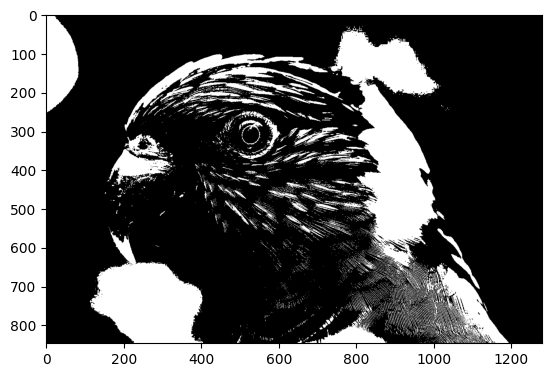

In [17]:
# 1bit color depth and 1 channel

_, binary_image = cv2.threshold(gray_img_by_cv2, 128, 255, cv2.THRESH_BINARY)
print("number-of-colors:", len(set(binary_image.flatten())))
plt.imshow(binary_image, cmap='gray');

# cv2.imwrite("image_1channel_1bit.png", binary_image, [cv2.IMWRITE_PNG_COMPRESSION,0,cv2.IMWRITE_PNG_STRATEGY_RLE,cv2.IMWRITE_PNG_BILEVEL,0,cv2.IMWRITE_PNG_STRATEGY_FIXED])

<hr>

If an image has 1 color channel(grayscale) and 2 bit color depth, then 1 pixel will be 2/8 bytes or 0.25 bytes

number-of-colors: 4


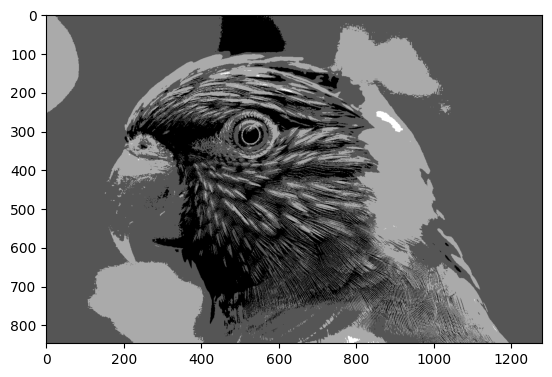

In [18]:
# 2bit color depth and 1 channel

scaled_image = (gray_img_by_cv2/64).astype(np.uint8)
print("number-of-colors:", len(set(scaled_image.flatten())))
plt.imshow(scaled_image, cmap='gray');

<hr>

If an image has 1 color channel(grayscale) and 3 bit color depth, then 1 pixel will be 3/8 bytes or 0.375 bytes

number-of-colors: 7


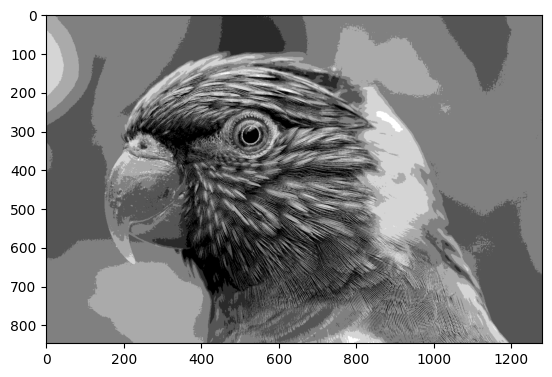

In [19]:
# 3bit color depth and 1 channel  --> 8 color combinations, 7 was used in this image

scaled_image = (gray_img_by_cv2/32).astype(np.uint8)
print("number-of-colors:", len(set(scaled_image.flatten())))
plt.imshow(scaled_image, cmap='gray');

<hr>

If an image has 1 color channel(grayscale) and 4 bit color depth, then 1 pixel will be 4/8 bytes or 0.5 bytes

number-of-colors: 14


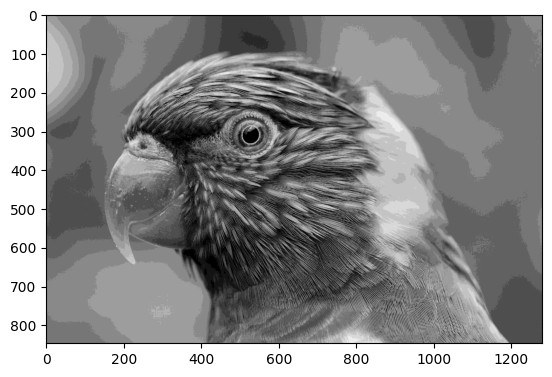

In [20]:
# 4bit color depth and 1 channel

scaled_image = (gray_img_by_cv2/16).astype(np.uint8)
print("number-of-colors:", len(set(scaled_image.flatten())))
plt.imshow(scaled_image, cmap='gray');

<hr>

If an image has 1 color channel(grayscale) and 8 bit color depth, then 1 pixel will be 8/8 bytes or 1 bytes

number-of-colors: 208


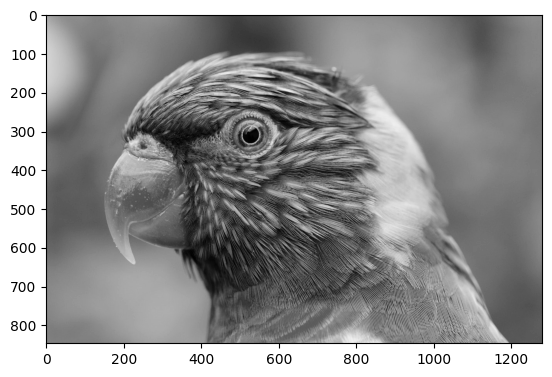

In [21]:
# 8bit color depth and 1 channel

scaled_image = (gray_img_by_cv2).astype(np.uint8)
print("number-of-colors:", len(set(scaled_image.flatten())))
plt.imshow(scaled_image, cmap='gray');

<hr>

If an image has 3 color channels and 1 bit color depth, then 1 pixel will be 3/8 bytes or 0.375 bytes

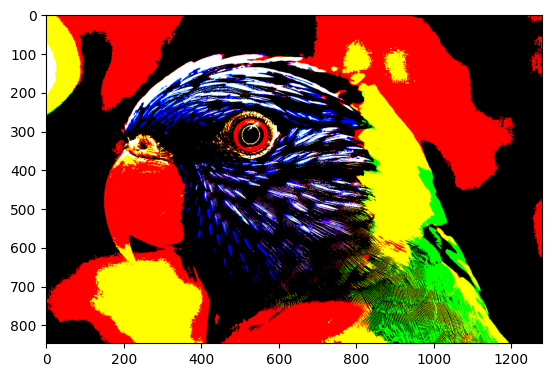

In [22]:
# 1bit color depth and 3 channel

_, binary_image_from_rgb_img_by_cv2 = cv2.threshold(rgb_img_by_cv2, 128, 255, cv2.THRESH_BINARY)
# cv2.imwrite("image_3channel_1bit.png", binary_image_from_rgb_img_by_cv2, [cv2.IMWRITE_PNG_COMPRESSION,0,cv2.IMWRITE_PNG_STRATEGY_RLE,cv2.IMWRITE_PNG_BILEVEL,0,cv2.IMWRITE_PNG_STRATEGY_FIXED])

# print(binary_image_from_rgb_img_by_cv2)
plt.imshow(binary_image_from_rgb_img_by_cv2);

<hr>

If an image has 3 color channels and every channel is 8 bit color depth, then 1 pixel will be 24/8 bytes or 3 bytes: 1 pixel for each channel. <br>Usually, an image has 3 color channels and every channel is 8 bit color depth called 24-bit-color(true color) image

number-of-colors: 256


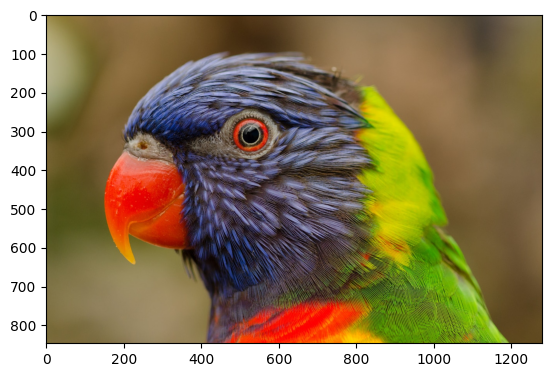

In [23]:
# 8bit color depth and 3 channel

scaled_image = (rgb_img_by_cv2).astype(np.uint8)
print("number-of-colors:", len(set(scaled_image.flatten())))
plt.imshow(scaled_image, cmap='gray');

<hr>

>However, when we save images with extension like (`jpg/jpeg`, `png`, `tiff`, `bmp` and etc.), these extensions uses their **compressing-algorithm** to save an image to memory. It means 1 pixel of the 24-bit-color image will not be 3 bytes, it will be much more smalller than 3 bytes thanks to those algorithms.
<hr>
<br>

# Extra Material:
## How some bunch of numbers seems like color to our eyes?

The human eye is able to perceive different colors because of the presence of special cells called "cone cells" in the retina. These cells are sensitive to different ranges of the electromagnetic spectrum, specifically, red, green, and blue light. When light of a certain wavelength enters the eye, it activates the corresponding cone cells, which in turn send signals to the brain. The brain then processes these signals and interprets them as different colors.

In the RGB color model, each color is represented by a combination of red, green, and blue values. The intensity of each color is represented by a value between 0 and 255, with 0 representing no intensity and 255 representing maximum intensity. When an image is displayed on a monitor, the red, green, and blue values are used to control the intensity of the red, green, and blue phosphors on the screen. By adjusting the levels of red, green, and blue, it's possible to create a wide range of different colors.

In summary, the human eye perceives different colors due to the presence of special cells called cone cells in the retina, which are sensitive to different ranges of the electromagnetic spectrum, specifically red, green, and blue light. In the RGB color model, each color is represented by a combination of red, green, and blue values, where the intensity of each color is represented by a value between 0 and 255. The brain processes these values and interprets them as different colors.

[**Read More...**](https://www.cbc.ca/natureofthings/features/your-brain-is-lying-to-you-colour-is-all-in-your-head-and-other-colourful-f) and [**Watch these videos...**](https://www.youtube.com/results?search_query=how+we+see+color)

<br>